In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman',size=15)

In [5]:
def read(fieldminMaxFile):
    with open(fieldminMaxFile,"r") as fp:
        comment=fp.readline()
        header=fp.readline()
    header=header[1:-1].split()
    indexs_processor=[]
    for i,name in enumerate(header):
        if header[i]=="processor":
            indexs_processor.append(i)
    indexs_processor.reverse()  

    data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
    data=data.drop(indexs_processor,axis=1)
    data.rename(columns=lambda x:header[x],inplace=True)
    return data

## Compare the results of the kinetics-limited mechanism

In [6]:
df_kinetics_RPM=read("./data/plots/kineticsLimited/fieldMinMax_RPM.dat")
df_kinetics_RPM.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,572.9948,(1.750000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
1,0.000003,T,572.9949,(2.350000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
2,0.000004,T,572.9949,(2.750000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
3,0.000006,T,572.9950,(3.250000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
4,0.000009,T,572.9951,(3.750000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)


In [7]:
df_kinetics_external=read("./data/plots/kineticsLimited/fieldMinMax_external.dat")
df_kinetics_external.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,572.9948,(1.750000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
1,0.000003,T,572.9949,(2.350000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
2,0.000004,T,572.9949,(2.750000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
3,0.000006,T,572.9950,(3.250000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)
4,0.000009,T,572.9951,(3.750000e-05 4.050000e-05 5.000000e-07),573.0,(0.000000e+00 5.000000e-07 5.000000e-07)


In [8]:
Tref=573
TRPM=df_kinetics_RPM.iloc[-1,:]["max"]-Tref
TExternal=df_kinetics_external.iloc[-1,:]["max"]-Tref
print(f"temperature increase by RPM: {TRPM:.2f} K")
print(f"temperature increase by External: {TExternal:.2f} K")
Tdiff=TRPM-TExternal
print(f"combustion temperature difference: {Tdiff:.2f} K")

temperature increase by RPM: 11.81 K
temperature increase by External: 1.65 K
combustion temperature difference: 10.16 K


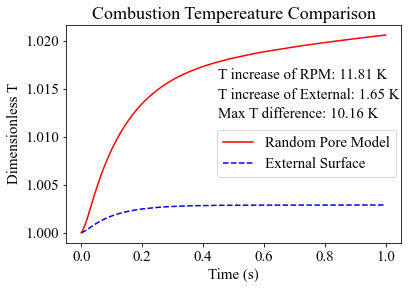

In [9]:

fig, ax = plt.subplots()
ax.plot(df_kinetics_RPM["Time"],df_kinetics_RPM["max"]/Tref,lineStyle="-",color="r",label="Random Pore Model")
ax.plot(df_kinetics_external["Time"],df_kinetics_external["max"]/Tref,lineStyle="--",color="b",label="External Surface")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Comparison")
ax.text(0.45,1.016,f"T increase of RPM: {TRPM:.2f} K")
ax.text(0.45,1.014,f"T increase of External: {TExternal:.2f} K")
ax.text(0.45,1.012,f"Max T difference: {Tdiff:.2f} K")

ax.legend(loc=[0.45,0.3])


## Compare the results of the convection-limited mechanism

In [10]:
df_convection_RPM=read("./data/plots/convectionLimited//fieldMinMax_RPM.dat")
df_convection_RPM.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,772.9480,(1.750000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
1,0.000003,T,772.9488,(2.350000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
2,0.000004,T,772.9495,(2.750000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
3,0.000006,T,772.9501,(3.250000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
4,0.000009,T,772.9508,(3.750000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)


In [11]:
df_convection_external=read("./data/plots/convectionLimited/fieldMinMax_external.dat")
df_convection_external.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,772.9480,(1.750000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
1,0.000003,T,772.9488,(2.350000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
2,0.000004,T,772.9495,(2.750000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
3,0.000006,T,772.9501,(3.250000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)
4,0.000009,T,772.9508,(3.750000e-05 4.050000e-05 5.000000e-07),773.0,(0.000000e+00 5.000000e-07 5.000000e-07)


In [12]:
Tref=773
TRPMC=df_convection_RPM.iloc[-1,:]["max"]-Tref
TExternalC=df_convection_external.iloc[-1,:]["max"]-Tref
print(f"temperature increase by RPM: {TRPMC:.2f} K")
print(f"temperature increase by External: {TExternalC:.2f} K")
TdiffC=TRPM-TExternal
print(f"combustion temperature difference: {TdiffC:.2f} K")

temperature increase by RPM: 2033.49 K
temperature increase by External: 2052.28 K
combustion temperature difference: 10.16 K


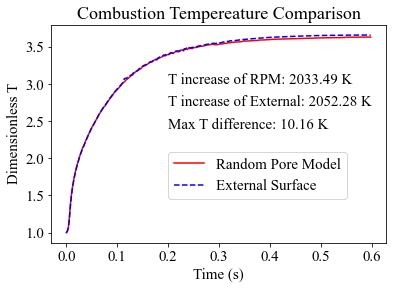

In [13]:
fig, ax = plt.subplots()
ax.plot(df_convection_RPM["Time"][df_convection_RPM.index%20==0],df_convection_RPM["max"][df_convection_RPM.index%20==0]/Tref,lineStyle="-",color="r",label="Random Pore Model")
ax.plot(df_convection_external["Time"][df_convection_external.index%20==0],df_convection_external["max"][df_convection_external.index%20==0]/Tref,lineStyle="--",color="b",label="External Surface")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Comparison")
ax.text(0.2,3.0,f"T increase of RPM: {TRPMC:.2f} K")
ax.text(0.2,2.7,f"T increase of External: {TExternalC:.2f} K")
ax.text(0.2,2.4,f"Max T difference: {TdiffC:.2f} K")

ax.legend(loc=[0.35,0.2])


## Conclusion

1. not significant for the convection limite regime, but significant for the kinetics-limited ase
2. affact the regime boundary between the kinetics-limited and the competitive regime, and then affact the ignition temperature boundm